# AMERICAN COLLEGE FOOTBALL GRAPH ANALYSIS 

**Dataset Description:**
The Football dataset is a social network dataset that represents the American college football teams and the games played between them during a season. It was originally compiled by Mark Newman and is widely used in network analysis research, particularly for studying community detection and modularity in networks.

**Nodes:**
Each node in the dataset represents a college football team. The dataset includes teams from various conferences in the NCAA (National Collegiate Athletic Association) league.

**Edges:**
Edges represent games played between two teams. An edge connects two nodes (teams) if they played against each other in that season.

**Graph Representation:**
The dataset is represented as an undirected graph where nodes correspond to teams and edges correspond to games. The teams are grouped by conference, and the dataset highlights the intra-conference and inter-conference games, making it useful for exploring community structures within the network.

This dataset provides insights into how communities (conferences) are formed within the larger structure of college football, allowing for the study of connectivity patterns and interaction frequency among teams.

### Install Required Packages

In [188]:
!pip3 install networkx matplotlib

### Import Libraries

In [24]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

### Load and Visualize the Network


In [27]:
import networkx as nx

# Load the GML file
G = nx.read_gml("Downloads/football.gml")

# Check some basic properties
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 115
Number of edges: 613


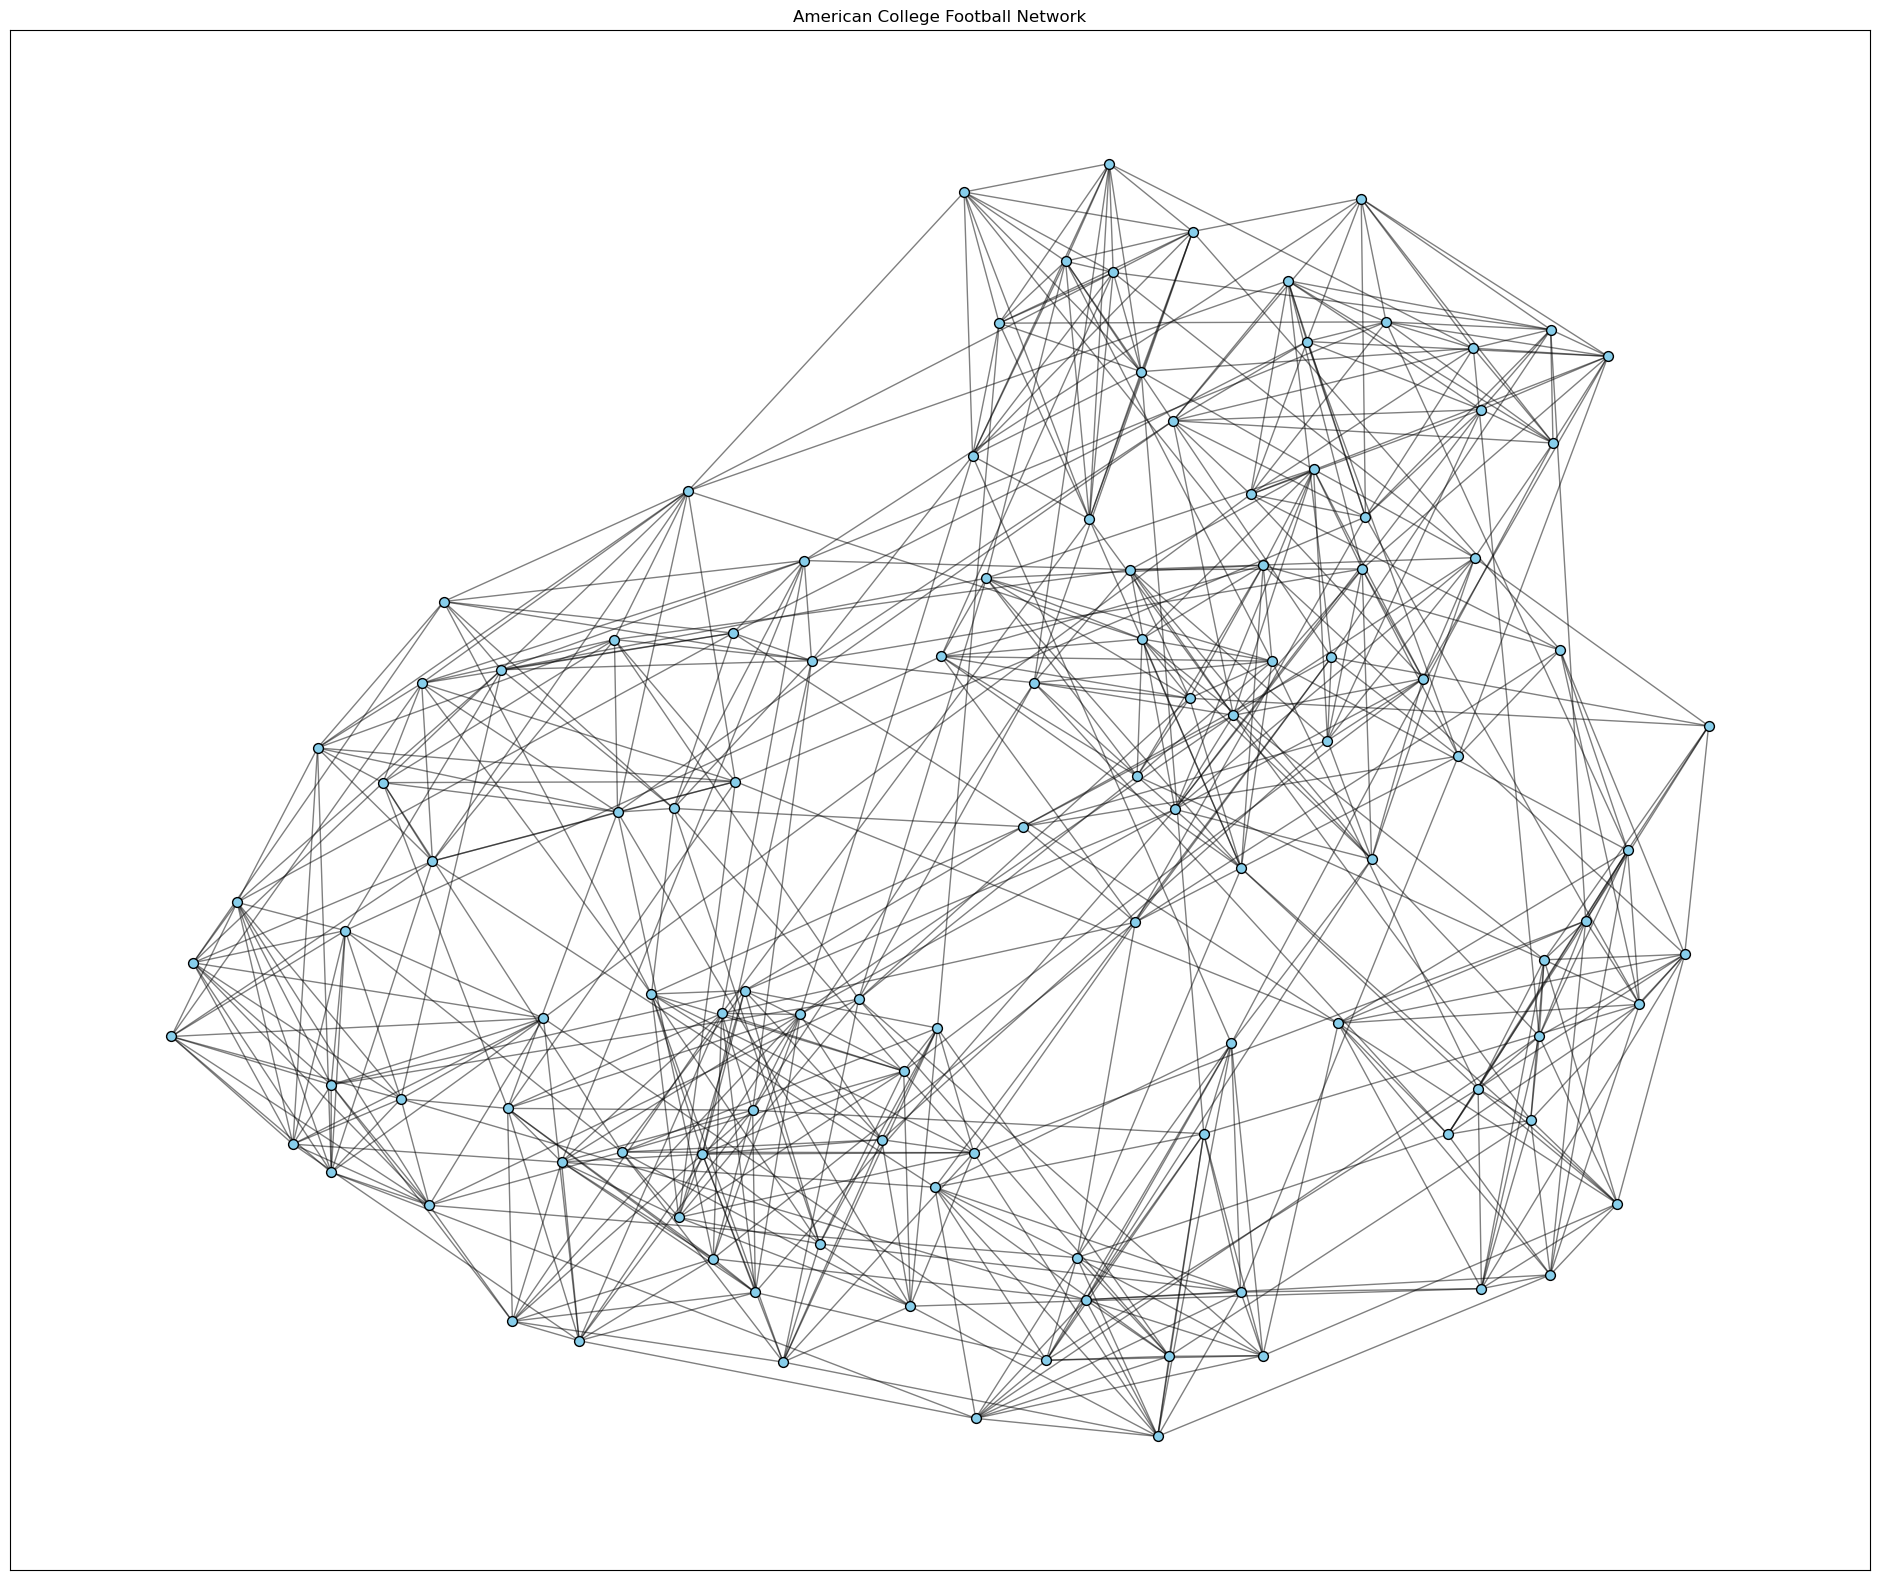

In [244]:
# Plotting the graph
plt.figure(figsize=(24, 20))
pos = nx.spring_layout(G, seed=42)  # Using spring layout for clear visualization

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=50, node_color='skyblue', edgecolors='black')
nx.draw_networkx_edges(G, pos, alpha=0.5)

# Optional: Add labels for nodes (only if needed, it can get cluttered)
# nx.draw_networkx_labels(G, pos, font_size=6)

# Display plot
plt.title("American College Football Network")
plt.show()


### Degree distribution

                   Node  Degree
0          BrighamYoung      12
1    SouthernCalifornia      12
2                Nevada      12
3             Wisconsin      12
4        NevadaLasVegas      12
..                  ...     ...
110          BoiseState       9
111     LouisianaMonroe       8
112      CentralFlorida       8
113  LouisianaLafayette       8
114         Connecticut       7

[115 rows x 2 columns]


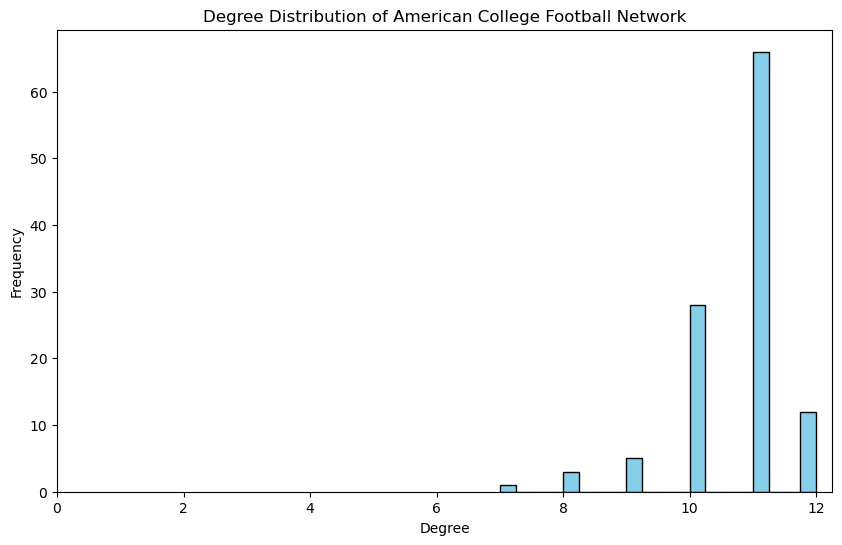

In [255]:
import pandas as pd

# Calculate the degree of each node
degree_dict = dict(G.degree())

# Create a DataFrame for the degree distribution
degree_df = pd.DataFrame(list(degree_dict.items()), columns=["Node", "Degree"])
degree_df = degree_df.sort_values(by="Degree", ascending=False).reset_index(drop=True)

# Display the degree distribution in tabular format
print(degree_df)

# Assuming degree_dict is already defined
plt.figure(figsize=(10, 6))

# Plot degree distribution as a histogram
plt.hist(degree_dict.values(), bins=20, color='skyblue', edgecolor='black')

# Set x-axis limit to start from 0
plt.xlim(left=0)

# Add labels and title
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution of American College Football Network")

# Show the plot
plt.show()

### Cumulative Degree Distribution

Cumulative Degree Distribution Table:
   Degree  Cumulative Frequency
0       7                     1
1       8                     4
2       9                     9
3      10                    37
4      11                   103
5      12                   115


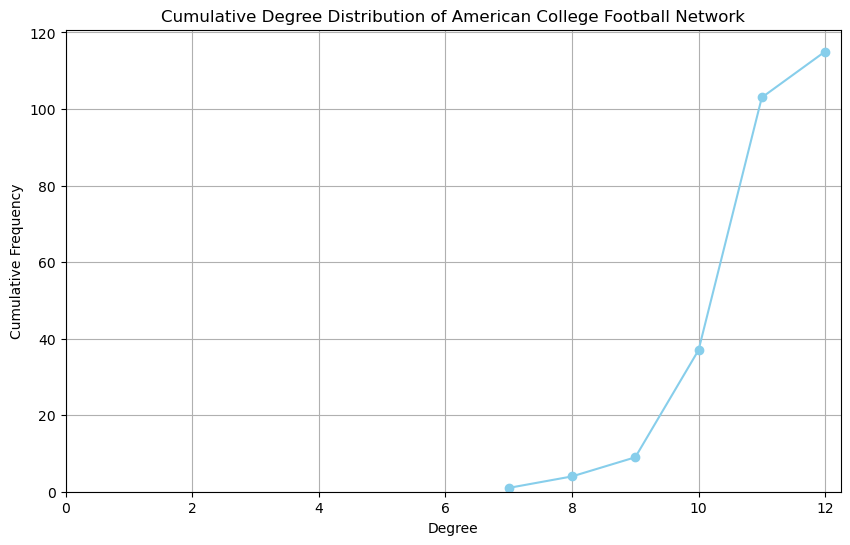

In [261]:
# Calculate the degree of each node
degree_dict = dict(G.degree())

# Convert degree data into a DataFrame
degree_df = pd.DataFrame(list(degree_dict.items()), columns=["Node", "Degree"])

# Calculate cumulative degree distribution
degree_counts = degree_df["Degree"].value_counts().sort_index()
cumulative_counts = degree_counts.cumsum()

# Create a new DataFrame for cumulative degree distribution
cumulative_degree_df = pd.DataFrame({
    "Degree": cumulative_counts.index,
    "Cumulative Frequency": cumulative_counts.values
})

print("Cumulative Degree Distribution Table:")
print(cumulative_degree_df)

# Plotting the cumulative degree distribution
plt.figure(figsize=(10, 6))
plt.plot(cumulative_degree_df["Degree"], cumulative_degree_df["Cumulative Frequency"], marker='o', color='skyblue')

# Set axis limits to start from 0
plt.xlim(left=0)
plt.ylim(bottom=0)

# Add labels and title
plt.xlabel("Degree")
plt.ylabel("Cumulative Frequency")
plt.title("Cumulative Degree Distribution of American College Football Network")

# Show the plot
plt.grid()
plt.show()


### Betweenness Centrality

Betweenness Centrality Table:
                  Node  Betweenness Centrality
0         BrighamYoung                0.032490
1         FloridaState                0.017621
2                 Iowa                0.013122
3          KansasState                0.023070
4            NewMexico                0.010664
..                 ...                     ...
110     TexasChristian                0.014370
111         California                0.007516
112  AlabamaBirmingham                0.011582
113           Arkansas                0.006498
114             Hawaii                0.010246

[115 rows x 2 columns]


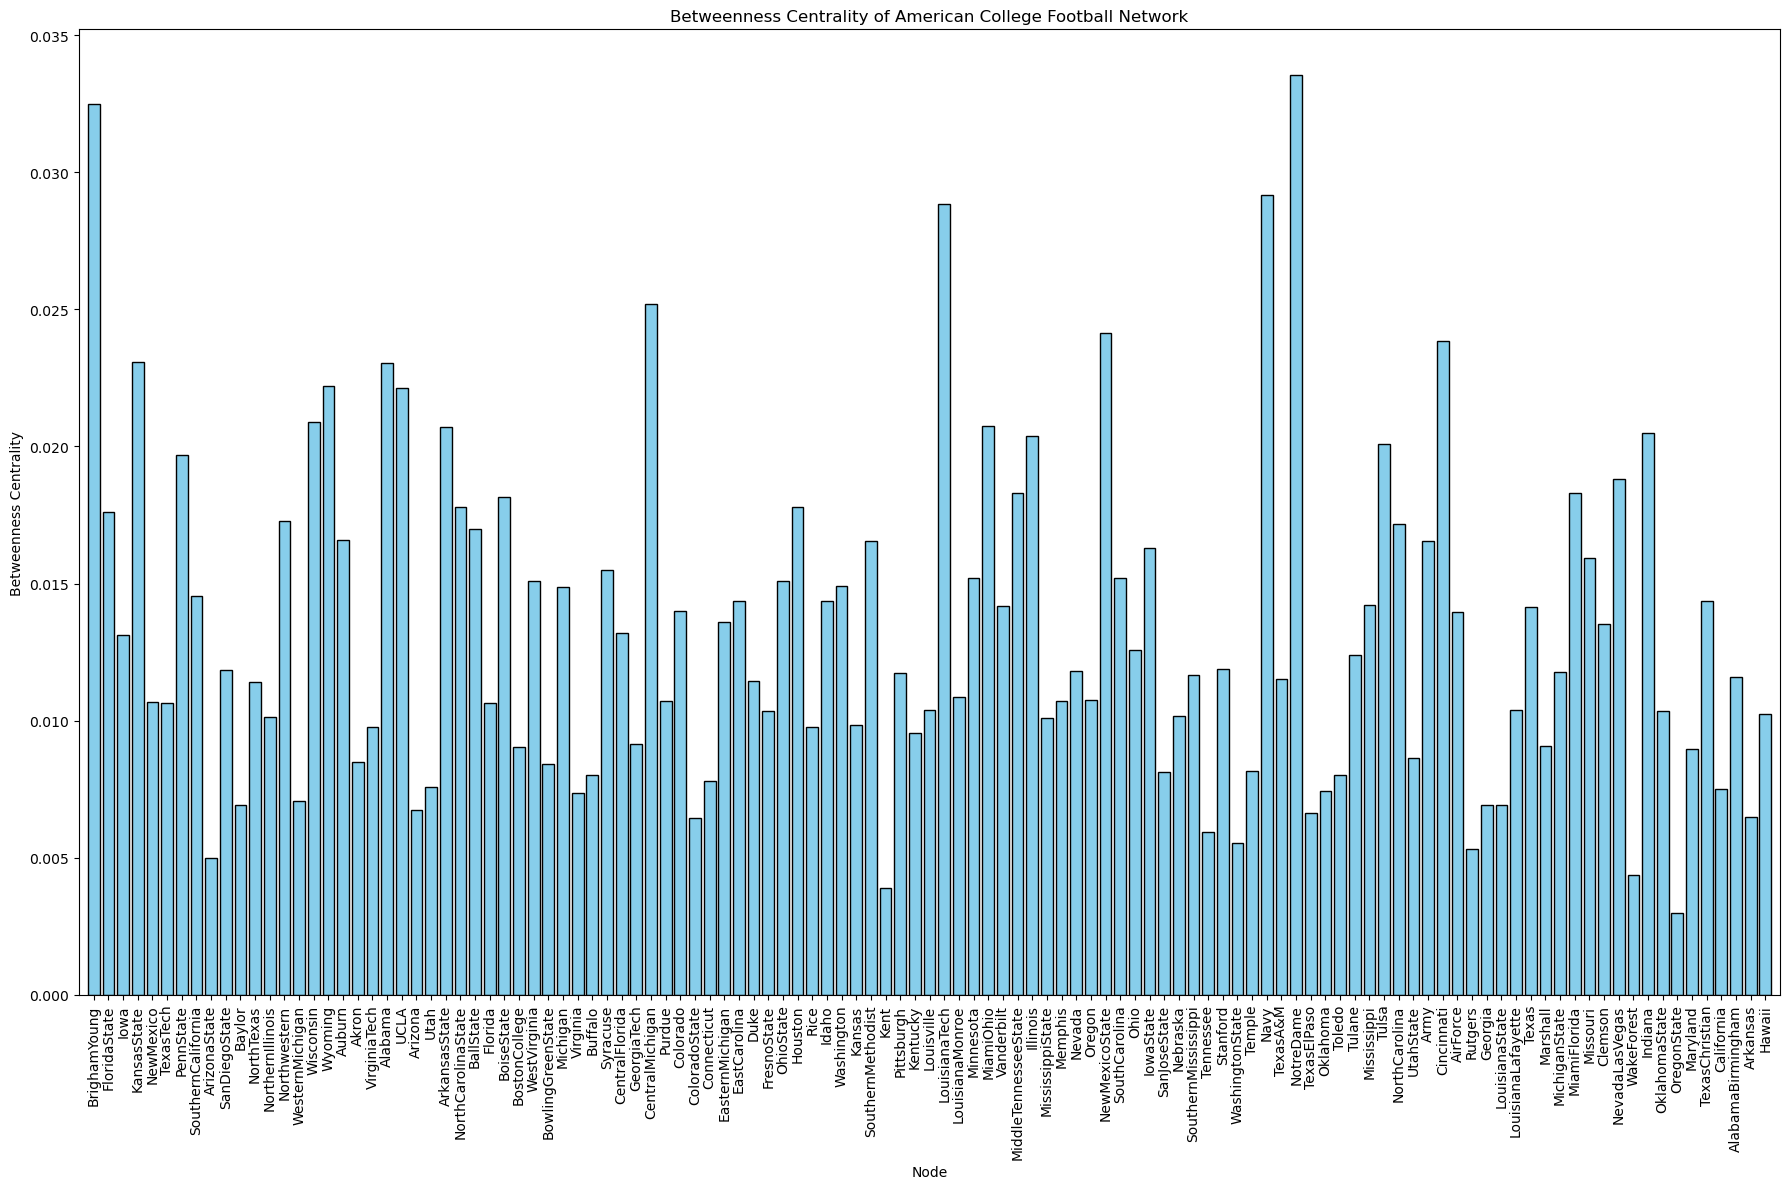

In [273]:
# Calculate betweenness centrality for each node
betweenness_centrality = nx.betweenness_centrality(G)

# Convert betweenness centrality data into a DataFrame for tabular display
bc_df = pd.DataFrame(list(betweenness_centrality.items()), columns=["Node", "Betweenness Centrality"])
print("Betweenness Centrality Table:")
print(bc_df)

# Plotting the betweenness centrality
plt.figure(figsize=(18, 12))
bars = plt.bar(bc_df["Node"], bc_df["Betweenness Centrality"], color='skyblue', edgecolor='black', width=0.8)

# Set axis limits to start from 0
plt.xlim(left=-1, right=len(bc_df["Node"]))  # Allowing for spacing
plt.ylim(bottom=0)  # Start y-axis from 0

# Add labels and title
plt.xlabel("Node")
plt.ylabel("Betweenness Centrality")
plt.title("Betweenness Centrality of American College Football Network")

# Set x-axis ticks to show node labels
plt.xticks(ticks=range(len(bc_df["Node"])), labels=bc_df["Node"], rotation=90)

# Show the plot
plt.tight_layout()  # Adjust layout to make room for x-axis labels
plt.show()


### Closeness Centrality

Closeness Centrality Table:
                  Node  Closeness Centrality
0         BrighamYoung              0.423792
1         FloridaState              0.413043
2                 Iowa              0.407143
3          KansasState              0.420664
4            NewMexico              0.402827
..                 ...                   ...
110     TexasChristian              0.413043
111         California              0.382550
112  AlabamaBirmingham              0.395833
113           Arkansas              0.377483
114             Hawaii              0.413043

[115 rows x 2 columns]


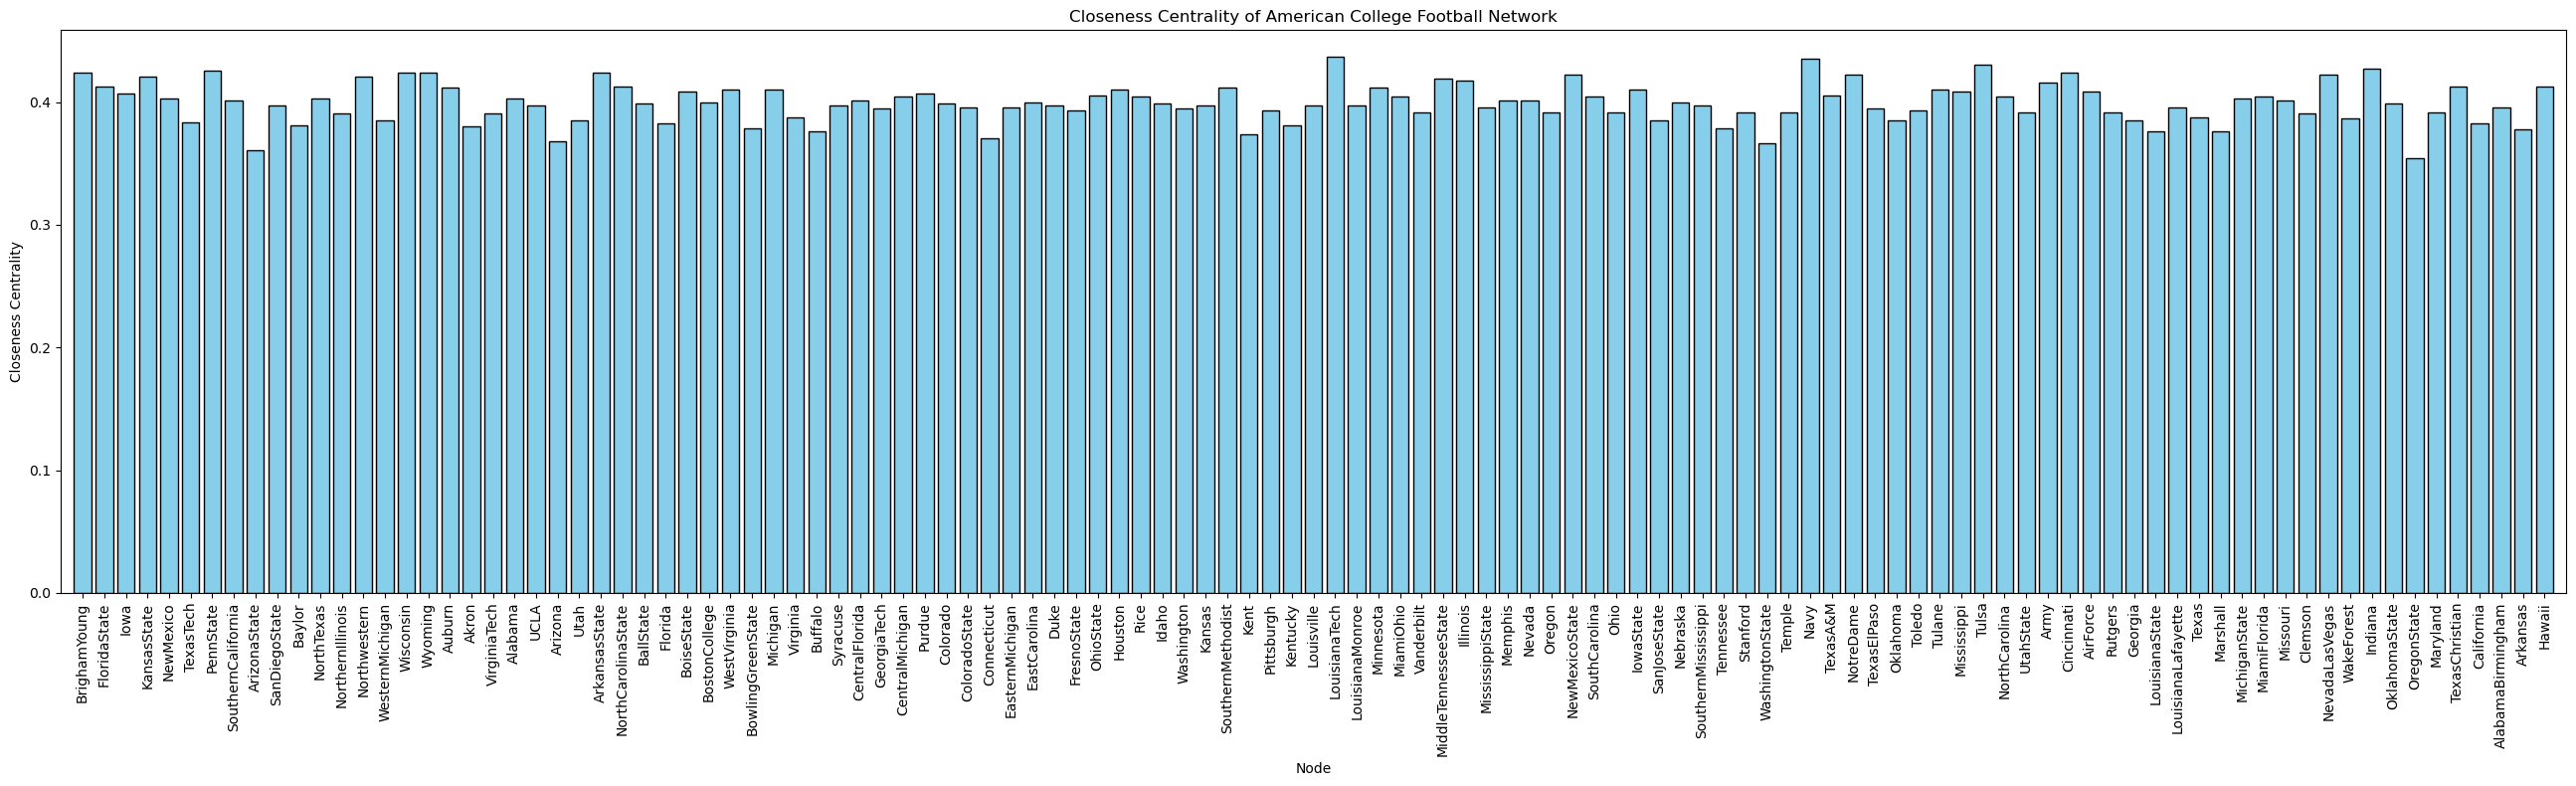

In [301]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate closeness centrality for each node
closeness_centrality = nx.closeness_centrality(G)

# Convert closeness centrality data into a DataFrame for tabular display
cc_df = pd.DataFrame(list(closeness_centrality.items()), columns=["Node", "Closeness Centrality"])
print("Closeness Centrality Table:")
print(cc_df)

# Plotting the closeness centrality
plt.figure(figsize=(26, 8))
bars = plt.bar(cc_df["Node"], cc_df["Closeness Centrality"], color='skyblue', edgecolor='black', width=0.8)

# Set axis limits to start from 0
plt.xlim(left=-1, right=len(cc_df["Node"]))  # Allowing for spacing
plt.ylim(bottom=0)  # Start y-axis from 0

# Add labels and title
plt.xlabel("Node")
plt.ylabel("Closeness Centrality")
plt.title("Closeness Centrality of American College Football Network")

# Set x-axis ticks to show node labels
plt.xticks(ticks=range(len(cc_df["Node"])), labels=cc_df["Node"], rotation=90)

# Show the plot
plt.tight_layout()  # Adjust layout to make room for x-axis labels
plt.show()


### Eigenvector Centrality

Eigenvector Centrality Table:
                  Node  Eigenvector Centrality
0         BrighamYoung                0.106503
1         FloridaState                0.096385
2                 Iowa                0.116262
3          KansasState                0.106250
4            NewMexico                0.101190
..                 ...                     ...
110     TexasChristian                0.114943
111         California                0.111198
112  AlabamaBirmingham                0.073015
113           Arkansas                0.070452
114             Hawaii                0.117695

[115 rows x 2 columns]


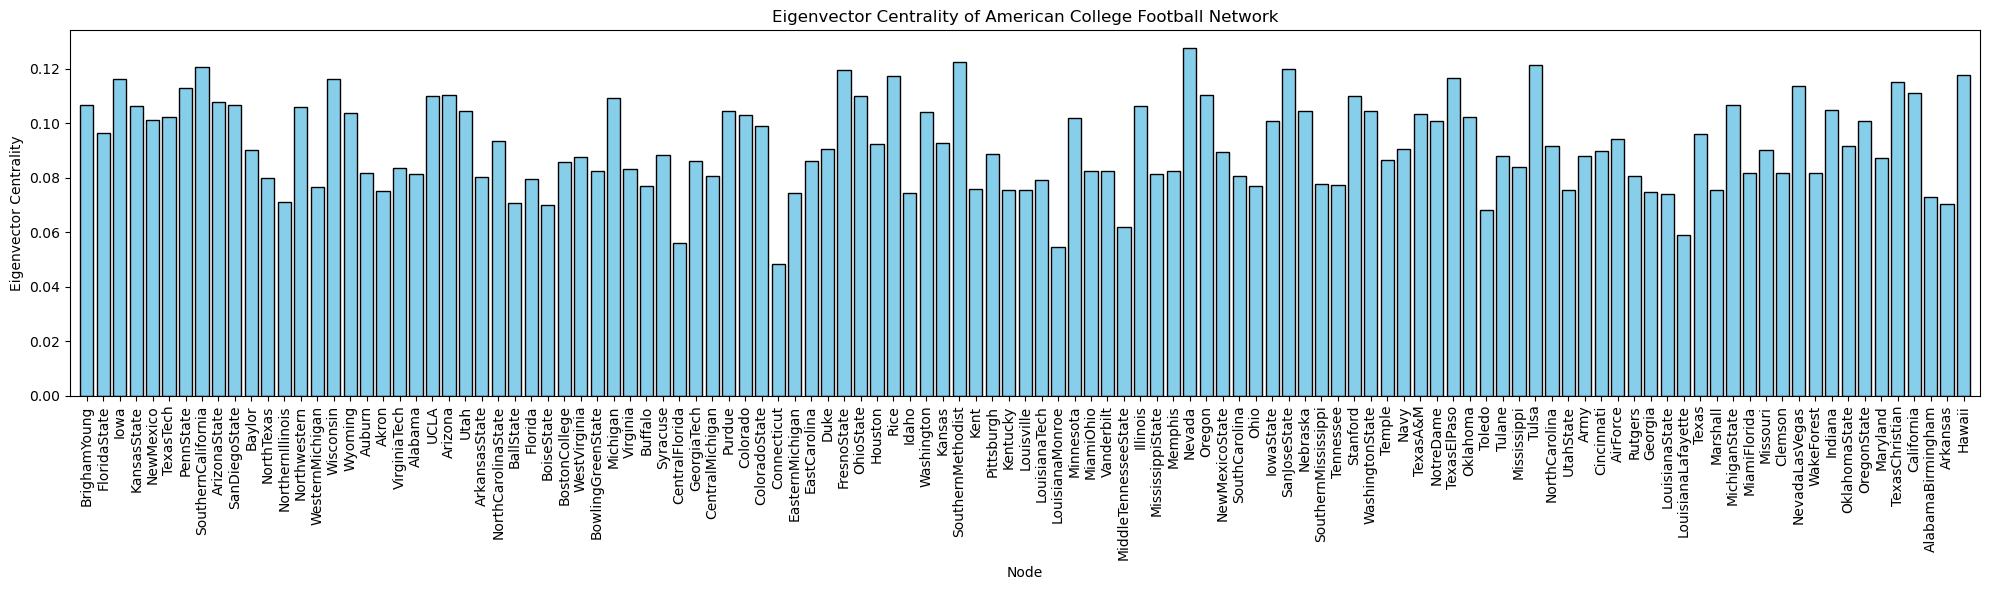

In [305]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate eigenvector centrality for each node
eigenvector_centrality = nx.eigenvector_centrality(G)

# Convert eigenvector centrality data into a DataFrame for tabular display
ec_df = pd.DataFrame(list(eigenvector_centrality.items()), columns=["Node", "Eigenvector Centrality"])
print("Eigenvector Centrality Table:")
print(ec_df)

# Plotting the eigenvector centrality
plt.figure(figsize=(20, 6))
bars = plt.bar(ec_df["Node"], ec_df["Eigenvector Centrality"], color='skyblue', edgecolor='black', width=0.8)

# Set axis limits to start from 0
plt.xlim(left=-1, right=len(ec_df["Node"]))  # Allowing for spacing
plt.ylim(bottom=0)  # Start y-axis from 0

# Add labels and title
plt.xlabel("Node")
plt.ylabel("Eigenvector Centrality")
plt.title("Eigenvector Centrality of American College Football Network")

# Set x-axis ticks to show node labels
plt.xticks(ticks=range(len(ec_df["Node"])), labels=ec_df["Node"], rotation=90)

# Show the plot
plt.tight_layout()  # Adjust layout to make room for x-axis labels
plt.show()


### Local Clustering Coefficient

Local Clustering Coefficient Table:
                  Node  Clustering Coefficient
0         BrighamYoung                0.348485
1         FloridaState                0.439394
2                 Iowa                0.378788
3          KansasState                0.333333
4            NewMexico                0.418182
..                 ...                     ...
110     TexasChristian                0.509091
111         California                0.472727
112  AlabamaBirmingham                0.288889
113           Arkansas                0.444444
114             Hawaii                0.545455

[115 rows x 2 columns]


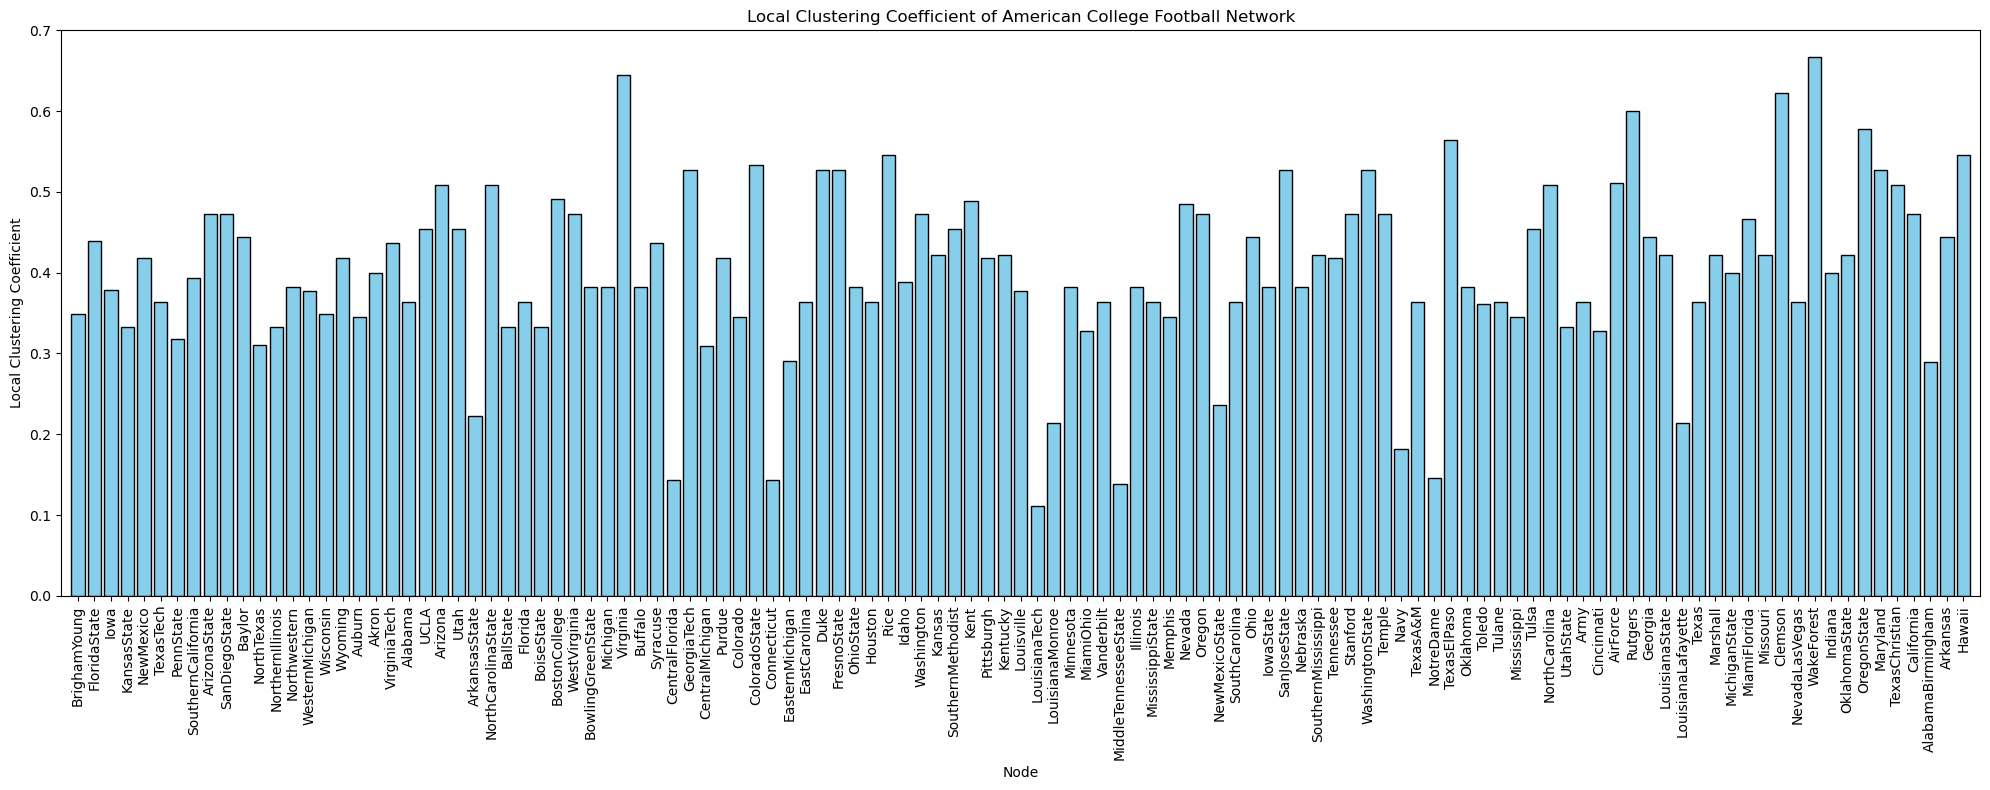

In [327]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the local clustering coefficient for each node
clustering_coefficients = nx.clustering(G)

# Convert clustering coefficient data into a DataFrame for tabular display
cc_df = pd.DataFrame(list(clustering_coefficients.items()), columns=["Node", "Clustering Coefficient"])
print("Local Clustering Coefficient Table:")
print(cc_df)

# Plotting the local clustering coefficients
plt.figure(figsize=(20, 8))
bars = plt.bar(cc_df["Node"], cc_df["Clustering Coefficient"], color='skyblue', edgecolor='black', width=0.8)

# Set axis limits to start from 0
plt.xlim(left=-1, right=len(cc_df["Node"]))  # Allowing for spacing
plt.ylim(bottom=0)  # Start y-axis from 0

# Add labels and title
plt.xlabel("Node")
plt.ylabel("Local Clustering Coefficient")
plt.title("Local Clustering Coefficient of American College Football Network")

# Set x-axis ticks to show node labels
plt.xticks(ticks=range(len(cc_df["Node"])), labels=cc_df["Node"], rotation=90)

# Show the plot
plt.tight_layout()  # Adjust layout to make room for x-axis labels
plt.show()


### Global Clustering Coefficient

Global Clustering Coefficient Table:
                          Metric     Value
0  Global Clustering Coefficient  0.403216


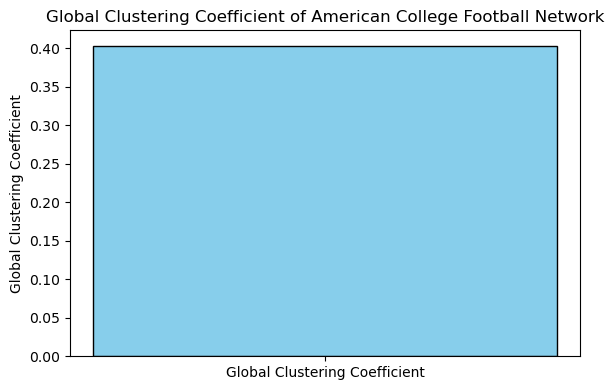

In [329]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the global clustering coefficient for the entire graph
global_clustering_coefficient = nx.average_clustering(G)

# Create a DataFrame for display
gcc_df = pd.DataFrame({'Metric': ['Global Clustering Coefficient'], 'Value': [global_clustering_coefficient]})

print("Global Clustering Coefficient Table:")
print(gcc_df)

# Plotting the global clustering coefficient
plt.figure(figsize=(6, 4))
bars = plt.bar(gcc_df['Metric'], gcc_df['Value'], color='skyblue', edgecolor='black')

# Set axis limits to start from 0
plt.ylim(bottom=0)  # Start y-axis from 0

# Add labels and title
plt.ylabel("Global Clustering Coefficient")
plt.title("Global Clustering Coefficient of American College Football Network")

# Show the plot
plt.tight_layout()  # Adjust layout to make room for x-axis labels
plt.show()


### Connected Components

In [339]:
 # Identify connected components
# Note: Since the Karate graph is undirected, it may contain multiple components.
# We'll get each component as a subgraph.
connected_components = [G.subgraph(c).copy() for c in nx.connected_components(G)]
print("Number of connected components:", len(connected_components))

Number of connected components: 1


### Girmann Newmann Algorithm

In [355]:
def girvan_newman(G):
    """Implement the Girvan-Newman algorithm for community detection."""
    # Create a copy of the graph
    G_copy = G.copy()
    
    # List to store the communities found
    communities = []
    
    # Continue until the graph is disconnected
    while nx.is_connected(G_copy):
        # Find the edge with the highest betweenness centrality
        edge_betweenness = nx.edge_betweenness_centrality(G_copy)
        edge_to_remove = max(edge_betweenness, key=edge_betweenness.get)
        
        # Remove the edge
        G_copy.remove_edge(*edge_to_remove)
    
    # Now the graph is disconnected; find the connected components
    for component in nx.connected_components(G_copy):
        communities.append(set(component))
    
    return communities

# Load your graph (G) here
# Example: G = nx.read_gml('football.gml')  # Load your graph from a file

# Run the Girvan-Newman algorithm
detected_communities = girvan_newman(G)

# Print the detected communities
print("Detected Communities:")
for i, community in enumerate(detected_communities):
    print(f"Community {i + 1}: {community}")

Detected Communities:
Community 1: {'OklahomaState', 'Nebraska', 'AirForce', 'Northwestern', 'WashingtonState', 'SanJoseState', 'FresnoState', 'OhioState', 'NotreDame', 'Oklahoma', 'ColoradoState', 'ArkansasState', 'PennState', 'Rice', 'NewMexicoState', 'Stanford', 'Iowa', 'California', 'TexasElPaso', 'Wyoming', 'Tulsa', 'IowaState', 'NevadaLasVegas', 'MichiganState', 'Kansas', 'Missouri', 'Texas', 'UtahState', 'Minnesota', 'SanDiegoState', 'Michigan', 'KansasState', 'Nevada', 'ArizonaState', 'UCLA', 'Baylor', 'NorthTexas', 'SouthernMethodist', 'TexasA&M', 'NewMexico', 'OregonState', 'Idaho', 'Hawaii', 'Wisconsin', 'Washington', 'Purdue', 'Indiana', 'TexasChristian', 'Colorado', 'Utah', 'BoiseState', 'Arizona', 'BrighamYoung', 'SouthernCalifornia', 'Oregon', 'TexasTech', 'Illinois'}
Community 2: {'Florida', 'Army', 'MiddleTennesseeState', 'LouisianaLafayette', 'WestVirginia', 'BallState', 'WesternMichigan', 'BowlingGreenState', 'Temple', 'NorthCarolina', 'WakeForest', 'GeorgiaTech', 'F

### BFS(Breadth first Search)

In [353]:
def bfs_analysis(G, start_node):
    """Perform BFS and analyze the graph."""
    # Perform BFS to get the order of nodes visited and distances
    bfs_tree = nx.bfs_tree(G, source=start_node)
    bfs_order = list(bfs_tree.nodes())
    bfs_distances = dict(nx.single_source_shortest_path_length(G, start_node))

    # Print BFS order and distances
    print("BFS Order of Nodes Visited:")
    print(bfs_order)
    
    print("\nDistance from Starting Node:")
    for node, distance in bfs_distances.items():
        print(f"Node: {node}, Distance: {distance}")

    return bfs_tree, bfs_order, bfs_distances

# Load your graph (G) here
# Example: G = nx.read_gml('football.gml')  # Load your graph from a file

# Choose the starting node
start_node = "BrighamYoung"  # Example starting node; replace with a valid node in your graph

# Perform BFS and analyze the results
bfs_tree, bfs_order, bfs_distances = bfs_analysis(G, start_node)

BFS Order of Nodes Visited:
['BrighamYoung', 'FloridaState', 'NewMexico', 'SanDiegoState', 'Wyoming', 'Utah', 'Virginia', 'Syracuse', 'ColoradoState', 'MississippiState', 'UtahState', 'AirForce', 'NevadaLasVegas', 'NorthCarolinaState', 'Florida', 'GeorgiaTech', 'Duke', 'Louisville', 'NorthCarolina', 'MiamiFlorida', 'Clemson', 'WakeForest', 'Maryland', 'TexasTech', 'BoiseState', 'NewMexicoState', 'OregonState', 'ArizonaState', 'Arizona', 'Illinois', 'Auburn', 'CentralMichigan', 'Nevada', 'TexasA&M', 'WashingtonState', 'California', 'VirginiaTech', 'BostonCollege', 'WestVirginia', 'Buffalo', 'EastCarolina', 'Pittsburgh', 'Temple', 'Cincinnati', 'Rutgers', 'Colorado', 'Alabama', 'Kentucky', 'MiddleTennesseeState', 'Memphis', 'SouthCarolina', 'Mississippi', 'LouisianaState', 'Arkansas', 'NorthTexas', 'ArkansasState', 'Idaho', 'Navy', 'NotreDame', 'Army', 'IowaState', 'Hawaii', 'SouthernMethodist', 'Indiana', 'BallState', 'Vanderbilt', 'Tennessee', 'Georgia', 'CentralFlorida', 'Northwestern

### DFS(Depth first Search)

DFS Order of Nodes Visited:
['BrighamYoung', 'FloridaState', 'NorthCarolinaState', 'ArkansasState', 'NorthTexas', 'KansasState', 'Iowa', 'PennState', 'SouthernCalifornia', 'ArizonaState', 'SanDiegoState', 'NewMexico', 'TexasTech', 'Baylor', 'Minnesota', 'Northwestern', 'NorthernIllinois', 'WesternMichigan', 'Wisconsin', 'Michigan', 'UCLA', 'Alabama', 'Auburn', 'Wyoming', 'Utah', 'Arizona', 'OhioState', 'Purdue', 'CentralMichigan', 'Akron', 'VirginiaTech', 'BostonCollege', 'WestVirginia', 'Syracuse', 'Buffalo', 'BallState', 'Florida', 'Kentucky', 'Louisville', 'Connecticut', 'EasternMichigan', 'BowlingGreenState', 'Kent', 'Pittsburgh', 'Temple', 'Navy', 'GeorgiaTech', 'Virginia', 'Duke', 'EastCarolina', 'Houston', 'Rice', 'FresnoState', 'SouthernMethodist', 'Kansas', 'Colorado', 'ColoradoState', 'Nevada', 'Oregon', 'Idaho', 'BoiseState', 'NewMexicoState', 'SouthCarolina', 'Vanderbilt', 'MiamiOhio', 'Ohio', 'IowaState', 'Nebraska', 'SanJoseState', 'Stanford', 'Washington', 'WashingtonSta

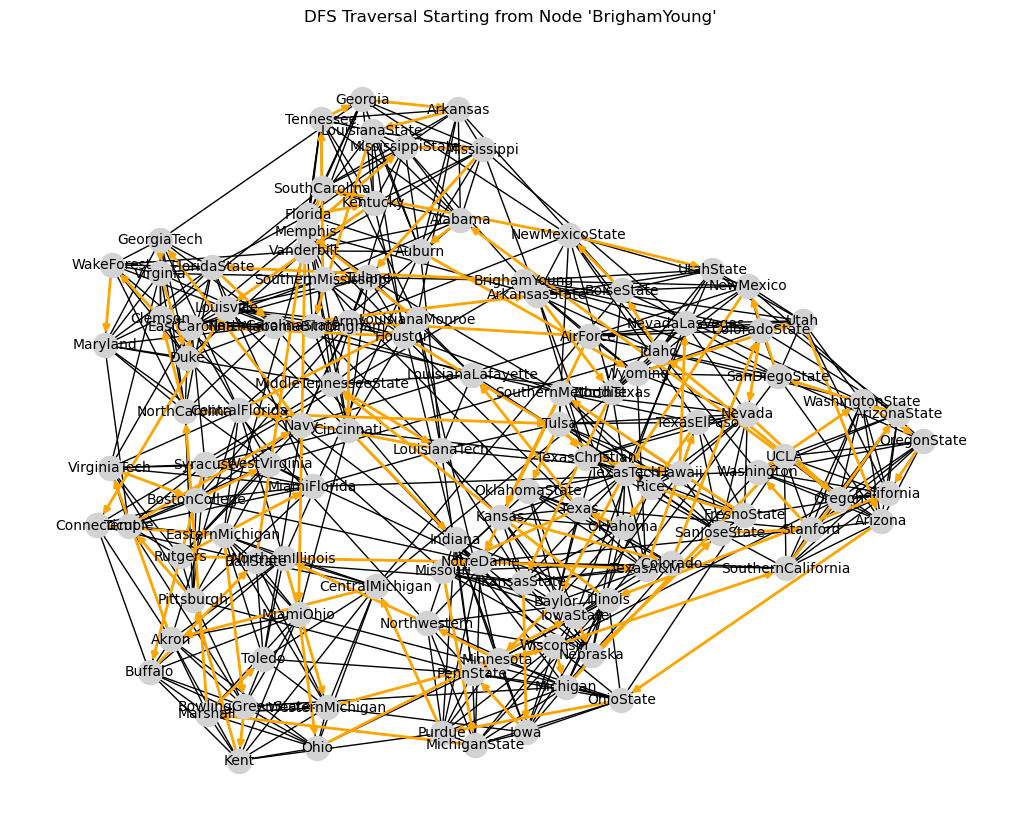

In [358]:
def dfs_analysis(G, start_node):
    """Perform DFS and analyze the graph."""
    # Perform DFS to get the order of nodes visited and distances
    dfs_tree = nx.dfs_tree(G, source=start_node)
    dfs_order = list(dfs_tree.nodes())
    dfs_distances = dict(nx.single_source_shortest_path_length(G, start_node))

    # Print DFS order and distances
    print("DFS Order of Nodes Visited:")
    print(dfs_order)
    
    print("\nDistance from Starting Node:")
    for node, distance in dfs_distances.items():
        print(f"Node: {node}, Distance: {distance}")

    return dfs_tree, dfs_order, dfs_distances

# Choose the starting node
start_node = "BrighamYoung"  # Example starting node; replace with a valid node in your graph

# Perform DFS and analyze the results
dfs_tree, dfs_order, dfs_distances = dfs_analysis(G, start_node)

### Edge Betweenness centrality

In [371]:
# Calculate edge betweenness centrality
edge_betweenness = nx.edge_betweenness_centrality(G)
print("Edge Betweenness Centrality for each edge:")
for edge, centrality in edge_betweenness.items():
    print(f"Edge {edge}: {centrality:.4f}")

Edge Betweenness Centrality for each edge:
Edge ('BrighamYoung', 'FloridaState'): 0.0096
Edge ('BrighamYoung', 'NewMexico'): 0.0047
Edge ('BrighamYoung', 'SanDiegoState'): 0.0059
Edge ('BrighamYoung', 'Wyoming'): 0.0048
Edge ('BrighamYoung', 'Utah'): 0.0055
Edge ('BrighamYoung', 'Virginia'): 0.0094
Edge ('BrighamYoung', 'Syracuse'): 0.0129
Edge ('BrighamYoung', 'ColoradoState'): 0.0052
Edge ('BrighamYoung', 'MississippiState'): 0.0097
Edge ('BrighamYoung', 'UtahState'): 0.0057
Edge ('BrighamYoung', 'AirForce'): 0.0030
Edge ('BrighamYoung', 'NevadaLasVegas'): 0.0048
Edge ('FloridaState', 'NorthCarolinaState'): 0.0037
Edge ('FloridaState', 'Florida'): 0.0068
Edge ('FloridaState', 'Virginia'): 0.0014
Edge ('FloridaState', 'GeorgiaTech'): 0.0023
Edge ('FloridaState', 'Duke'): 0.0027
Edge ('FloridaState', 'Louisville'): 0.0066
Edge ('FloridaState', 'NorthCarolina'): 0.0037
Edge ('FloridaState', 'MiamiFlorida'): 0.0080
Edge ('FloridaState', 'Clemson'): 0.0031
Edge ('FloridaState', 'WakeFores

### Katz Centrality



In [127]:
# Estimate the largest eigenvalue of the adjacency matrix
largest_eigenvalue = max(np.linalg.eigvals(nx.adjacency_matrix(G).todense())).real
alpha = 0.9 / largest_eigenvalue  # Set alpha slightly below the inverse of the largest eigenvalue

# Calculate Katz centrality with the adjusted alpha
try:
    katz_centrality = nx.katz_centrality(G, alpha=alpha, beta=1.0, normalized=True)
    print("Katz Centrality of each node:")
    for node, centrality in katz_centrality.items():
        print(f"Node {node}: {centrality:.4f}")
except nx.PowerIterationFailedConvergence:
    print("Katz centrality calculation did not converge. Consider lowering alpha further.")

Katz Centrality of each node:
Node BrighamYoung: 0.1048
Node FloridaState: 0.1003
Node Iowa: 0.1111
Node KansasState: 0.1037
Node NewMexico: 0.0981
Node TexasTech: 0.1003
Node PennState: 0.1088
Node SouthernCalifornia: 0.1117
Node ArizonaState: 0.1010
Node SanDiegoState: 0.1012
Node Baylor: 0.0889
Node NorthTexas: 0.0818
Node NorthernIllinois: 0.0785
Node Northwestern: 0.1024
Node WesternMichigan: 0.0820
Node Wisconsin: 0.1109
Node Wyoming: 0.1005
Node Auburn: 0.0885
Node Akron: 0.0833
Node VirginiaTech: 0.0895
Node Alabama: 0.0880
Node UCLA: 0.1029
Node Arizona: 0.1029
Node Utah: 0.0998
Node ArkansasState: 0.0828
Node NorthCarolinaState: 0.0956
Node BallState: 0.0785
Node Florida: 0.0875
Node BoiseState: 0.0737
Node BostonCollege: 0.0907
Node WestVirginia: 0.0920
Node BowlingGreenState: 0.0888
Node Michigan: 0.1042
Node Virginia: 0.0876
Node Buffalo: 0.0847
Node Syracuse: 0.0932
Node CentralFlorida: 0.0644
Node GeorgiaTech: 0.0911
Node CentralMichigan: 0.0863
Node Purdue: 0.1015
Node 

### Core Number

In [389]:
# Calculate the core number for each node
core_number = nx.core_number(G)

# Print the core number for each node
print("Core number for each node:")
for node, core in core_number.items():
    print(f"Node {node}: {core}")


Core number for each node:
Node BrighamYoung: 8
Node FloridaState: 8
Node Iowa: 8
Node KansasState: 8
Node NewMexico: 8
Node TexasTech: 8
Node PennState: 8
Node SouthernCalifornia: 8
Node ArizonaState: 8
Node SanDiegoState: 8
Node Baylor: 8
Node NorthTexas: 8
Node NorthernIllinois: 8
Node Northwestern: 8
Node WesternMichigan: 8
Node Wisconsin: 8
Node Wyoming: 8
Node Auburn: 8
Node Akron: 8
Node VirginiaTech: 8
Node Alabama: 8
Node UCLA: 8
Node Arizona: 8
Node Utah: 8
Node ArkansasState: 8
Node NorthCarolinaState: 8
Node BallState: 8
Node Florida: 8
Node BoiseState: 8
Node BostonCollege: 8
Node WestVirginia: 8
Node BowlingGreenState: 8
Node Michigan: 8
Node Virginia: 8
Node Buffalo: 8
Node Syracuse: 8
Node CentralFlorida: 8
Node GeorgiaTech: 8
Node CentralMichigan: 8
Node Purdue: 8
Node Colorado: 8
Node ColoradoState: 8
Node Connecticut: 7
Node EasternMichigan: 8
Node EastCarolina: 8
Node Duke: 8
Node FresnoState: 8
Node OhioState: 8
Node Houston: 8
Node Rice: 8
Node Idaho: 8
Node Washi

### K-Cliques

In [398]:
import networkx as nx

def find_k_cliques(G, k):
    """Find all k-cliques in the graph G."""
    cliques = list(nx.find_cliques(G))
    k_cliques = [clique for clique in cliques if len(clique) == k]
    return k_cliques

# Set the value of k
k = 3  # Change this value to find k-cliques of different sizes

# Find k-cliques
k_cliques = find_k_cliques(G, k)

# Print k-cliques
print(f"{k}-Cliques in the graph:")
for i, clique in enumerate(k_cliques, start=1):
    print(f"Clique {i}: {clique}")

# Analyze the number of k-cliques found
print(f"\nTotal number of {k}-cliques found: {len(k_cliques)}")


3-Cliques in the graph:
Clique 1: ['Florida', 'MiddleTennesseeState', 'MississippiState']
Clique 2: ['WashingtonState', 'Utah', 'California']
Clique 3: ['WashingtonState', 'Utah', 'Arizona']
Clique 4: ['WashingtonState', 'BoiseState', 'Idaho']
Clique 5: ['SanJoseState', 'Stanford', 'SouthernCalifornia']
Clique 6: ['FresnoState', 'UCLA', 'California']
Clique 7: ['WestVirginia', 'Maryland', 'Temple']
Clique 8: ['WesternMichigan', 'Wisconsin', 'Iowa']
Clique 9: ['WesternMichigan', 'Marshall', 'Toledo']
Clique 10: ['BowlingGreenState', 'Marshall', 'Toledo']
Clique 11: ['BowlingGreenState', 'EasternMichigan', 'MiamiOhio']
Clique 12: ['BowlingGreenState', 'EasternMichigan', 'Toledo']
Clique 13: ['BowlingGreenState', 'EasternMichigan', 'Temple']
Clique 14: ['BowlingGreenState', 'Temple', 'Pittsburgh']
Clique 15: ['BowlingGreenState', 'Pittsburgh', 'Kent']
Clique 16: ['ColoradoState', 'SanDiegoState', 'ArizonaState']
Clique 17: ['WakeForest', 'GeorgiaTech', 'Navy']
Clique 18: ['WakeForest', 'V

### K-Clans

In [404]:
import networkx as nx

def k_clan(G, k):
    clans = {}
    for node in G.nodes():
        # Find neighbors of the node
        neighbors = set(G.neighbors(node))
        # Count connections to other neighbors
        clan_members = {n for n in neighbors if len(set(G.neighbors(n)) & neighbors) >= k}
        # Include the node itself
        clan_members.add(node)
        clans[node] = clan_members
    return clans

# Set the value of k
k_value = 3  # You can change this value as needed

# Calculate k-clans
k_clans = k_clan(G, k_value)

# Print K-Clans
print(f"K-Clans for each node (k={k_value}):")
for node, clan in k_clans.items():
    print(f"Node {node}: {clan}")

K-Clans for each node (k=3):
Node BrighamYoung: {'NewMexico', 'AirForce', 'SanDiegoState', 'Utah', 'BrighamYoung', 'Wyoming', 'NevadaLasVegas', 'ColoradoState'}
Node FloridaState: {'NorthCarolina', 'WakeForest', 'GeorgiaTech', 'Duke', 'FloridaState', 'NorthCarolinaState', 'Virginia', 'Maryland', 'Clemson'}
Node Iowa: {'PennState', 'Indiana', 'Wisconsin', 'Iowa', 'Northwestern', 'Minnesota', 'OhioState', 'MichiganState', 'Illinois'}
Node KansasState: {'Kansas', 'Nebraska', 'Missouri', 'Colorado', 'KansasState', 'IowaState', 'Oklahoma', 'TexasA&M', 'TexasTech'}
Node NewMexico: {'NewMexico', 'AirForce', 'SanDiegoState', 'Utah', 'BrighamYoung', 'Wyoming', 'NevadaLasVegas', 'ColoradoState'}
Node TexasTech: {'Kansas', 'OklahomaState', 'Nebraska', 'Texas', 'KansasState', 'Baylor', 'NorthTexas', 'Oklahoma', 'TexasA&M', 'TexasTech'}
Node PennState: {'Indiana', 'PennState', 'Iowa', 'Purdue', 'Minnesota', 'Michigan', 'OhioState', 'MichiganState', 'Illinois'}
Node SouthernCalifornia: {'OregonState

### Louvian Method

In [145]:
pip install python-louvain


Note: you may need to restart the kernel to use updated packages.


Detected communities (node: community):
Node BrighamYoung: Community 5
Node FloridaState: Community 1
Node Iowa: Community 2
Node KansasState: Community 3
Node NewMexico: Community 5
Node TexasTech: Community 3
Node PennState: Community 2
Node SouthernCalifornia: Community 4
Node ArizonaState: Community 4
Node SanDiegoState: Community 5
Node Baylor: Community 3
Node NorthTexas: Community 5
Node NorthernIllinois: Community 6
Node Northwestern: Community 2
Node WesternMichigan: Community 6
Node Wisconsin: Community 2
Node Wyoming: Community 5
Node Auburn: Community 0
Node Akron: Community 6
Node VirginiaTech: Community 9
Node Alabama: Community 0
Node UCLA: Community 4
Node Arizona: Community 4
Node Utah: Community 5
Node ArkansasState: Community 5
Node NorthCarolinaState: Community 1
Node BallState: Community 6
Node Florida: Community 0
Node BoiseState: Community 5
Node BostonCollege: Community 9
Node WestVirginia: Community 9
Node BowlingGreenState: Community 6
Node Michigan: Community

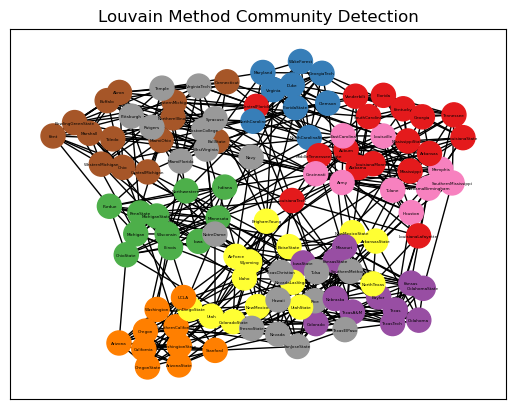

In [434]:
import community as community_louvain 


# Apply the Louvain method
partition = community_louvain.best_partition(G)

# Print the detected communities
print("Detected communities (node: community):")
for node, community in partition.items():
    print(f"Node {node}: Community {community}")

# Draw the graph with communities
pos = nx.spring_layout(G)  # Positioning for visualization
cmap = plt.get_cmap("Set1")  # Color map for communities

# Draw nodes with community color
nx.draw_networkx_nodes(G, pos, node_size=300, 
                       cmap=cmap, 
                       node_color=list(partition.values()))

# Draw edges
nx.draw_networkx_edges(G, pos, alpha=1.0)
nx.draw_networkx_labels(G, pos, font_size=3)

plt.title("Louvain Method Community Detection")
plt.show()

### Watt Strogatz model 

Watt-Strogatz Graph Properties:
Average Clustering Coefficient: 0.3840
Average Path Length: 4.9327


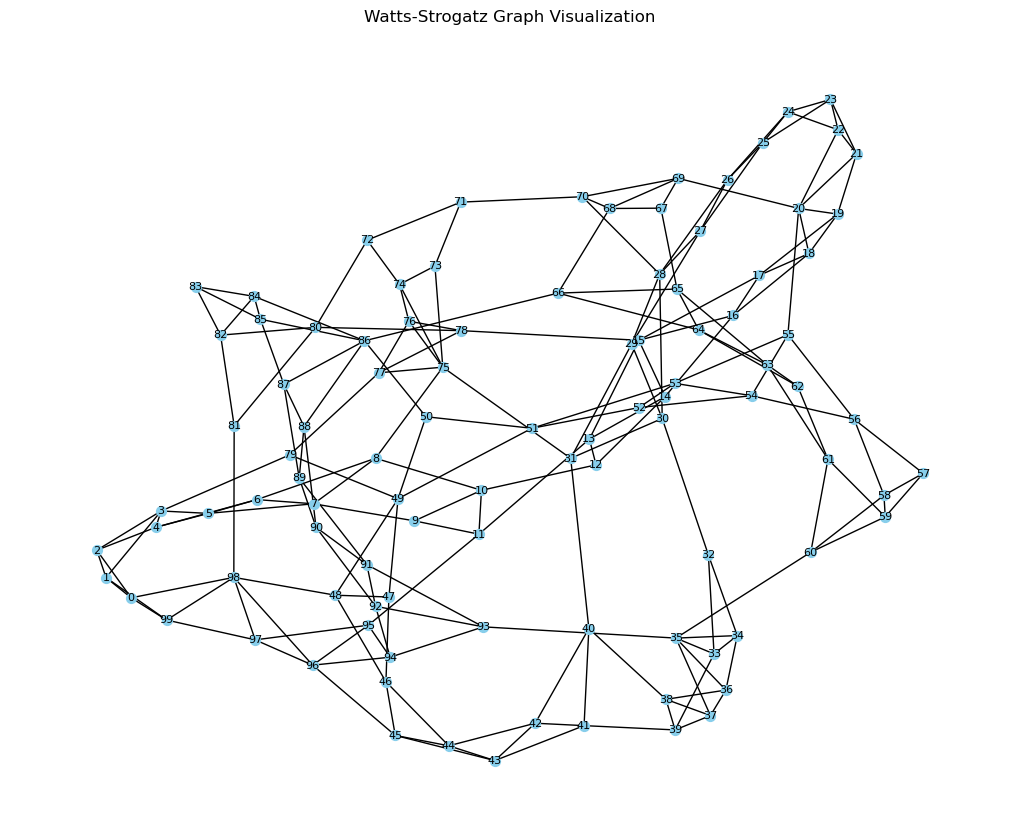

In [462]:
import networkx as nx
import matplotlib.pyplot as plt

# Parameters for the Watts-Strogatz model
n = 100      # Number of nodes
k = 4        # Each node is connected to k nearest neighbors in a ring topology
p = 0.1      # Probability of rewiring each edge

# Create a Watts-Strogatz graph
G_ws = nx.watts_strogatz_graph(n, k, p)

# Calculate properties of the graph
avg_clustering = nx.average_clustering(G_ws)
avg_path_length = nx.average_shortest_path_length(G_ws)

print(f"Watt-Strogatz Graph Properties:")
print(f"Average Clustering Coefficient: {avg_clustering:.4f}")
print(f"Average Path Length: {avg_path_length:.4f}")

# Visualization of the Watts-Strogatz graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G_ws)  # Positions for all nodes
nx.draw(G_ws, pos, with_labels=True, node_color='skyblue', node_size=50, font_size=8)
plt.title("Watts-Strogatz Graph Visualization")
plt.show()


### Barabási-Albert Model

Barabási-Albert Graph Properties:
Average Clustering Coefficient: 0.0864
Average Path Length: 3.0828


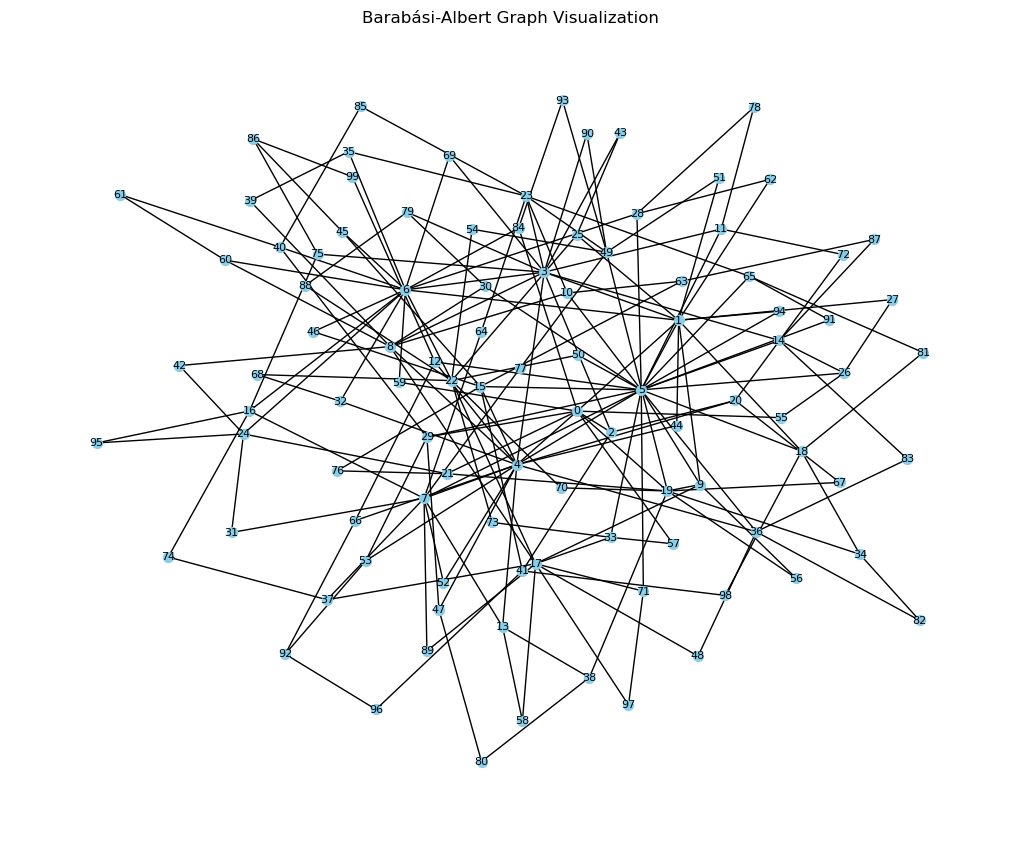

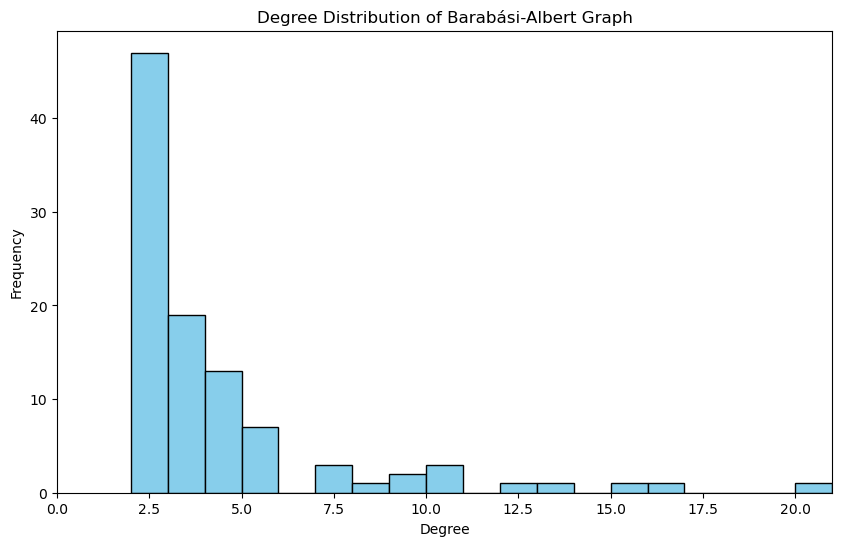

In [468]:
import networkx as nx
import matplotlib.pyplot as plt

# Parameters for the Barabási-Albert model
n = 100       # Total number of nodes
m = 2         # Number of edges to attach from a new node to existing nodes

# Create a Barabási-Albert graph
G_ba = nx.barabasi_albert_graph(n, m)

# Calculate properties of the graph
avg_clustering = nx.average_clustering(G_ba)
avg_path_length = nx.average_shortest_path_length(G_ba)
degree_sequence = sorted([d for n, d in G_ba.degree()], reverse=True)  # Degree sequence

# Print the calculated properties
print(f"Barabási-Albert Graph Properties:")
print(f"Average Clustering Coefficient: {avg_clustering:.4f}")
print(f"Average Path Length: {avg_path_length:.4f}")

# Visualization of the Barabási-Albert graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G_ba)  # Positions for all nodes
nx.draw(G_ba, pos, with_labels=True, node_color='skyblue', node_size=50, font_size=8)
plt.title("Barabási-Albert Graph Visualization")
plt.show()

# Plotting the degree distribution
plt.figure(figsize=(10, 6))
plt.hist(degree_sequence, bins=range(min(degree_sequence), max(degree_sequence) + 1), color='skyblue', edgecolor='black')
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution of Barabási-Albert Graph")
plt.xlim(0, max(degree_sequence))  # Start x-axis at 0
plt.show()
